# Library

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.simplefilter(action='ignore')

# EDA

In [2]:
df = pd.read_csv("C:\\Users\\Sathya Sai\\Downloads\\diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


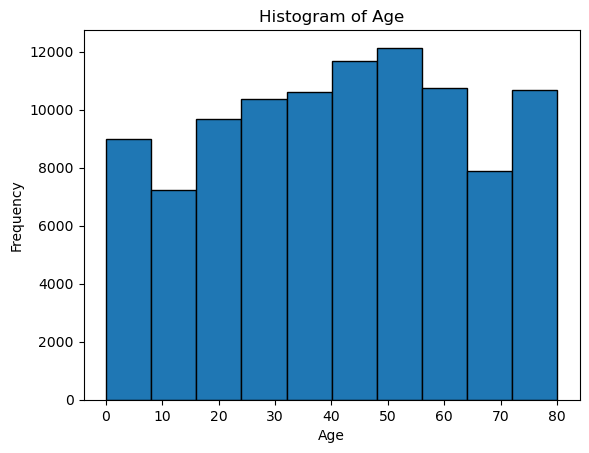

In [6]:
# Histogram for feature 'age'
plt.hist(df['age'], bins=10, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

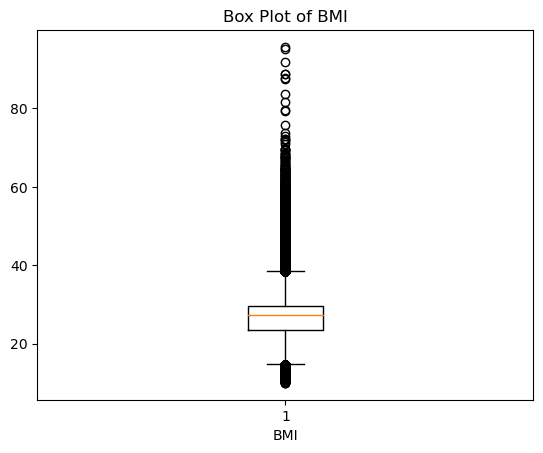

In [7]:
# Box plot for feature 'bmi'
plt.boxplot(df['bmi'])
plt.xlabel('BMI')
plt.title('Box Plot of BMI')
plt.show()

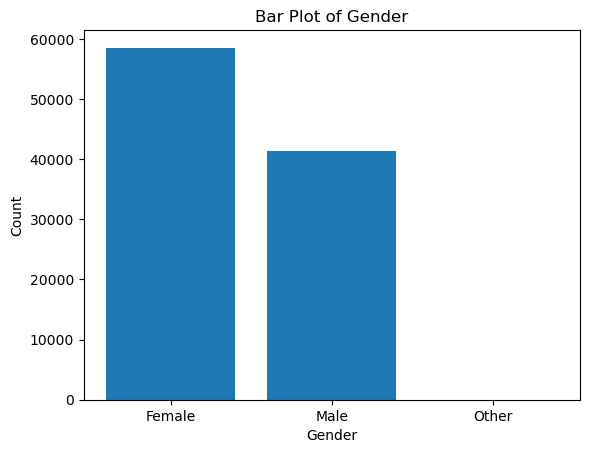

In [8]:
# Bar plot for feature 'gender'
gender_counts = df['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot of Gender')
plt.show()

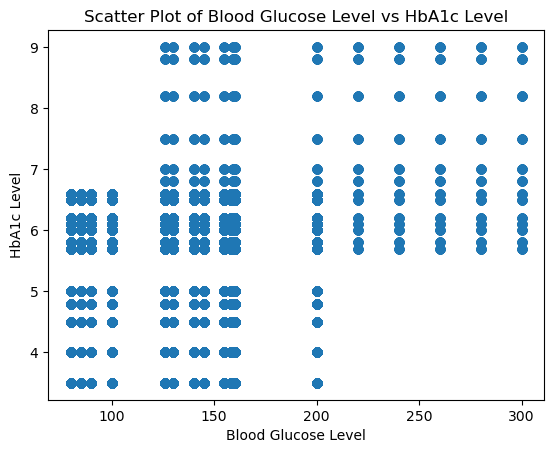

In [9]:
# Scatter plot for features 'blood_glucose_level' and 'HbA1c_level'
plt.scatter(df['blood_glucose_level'], df['HbA1c_level'])
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.title('Scatter Plot of Blood Glucose Level vs HbA1c Level')
plt.show()

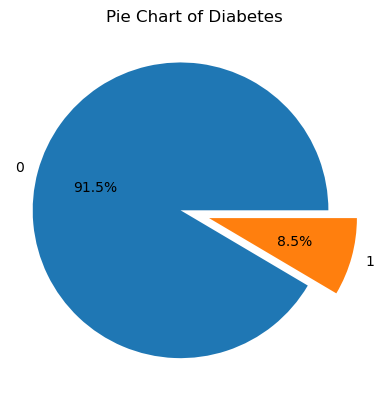

In [10]:
# Pie chart untuk variable 'diabetes'
diabetes_counts = df['diabetes'].value_counts()
plt.pie(diabetes_counts.values, labels=diabetes_counts.index, autopct='%1.1f%%',explode=[0.1,0.1])
plt.title('Pie Chart of Diabetes')
plt.show()

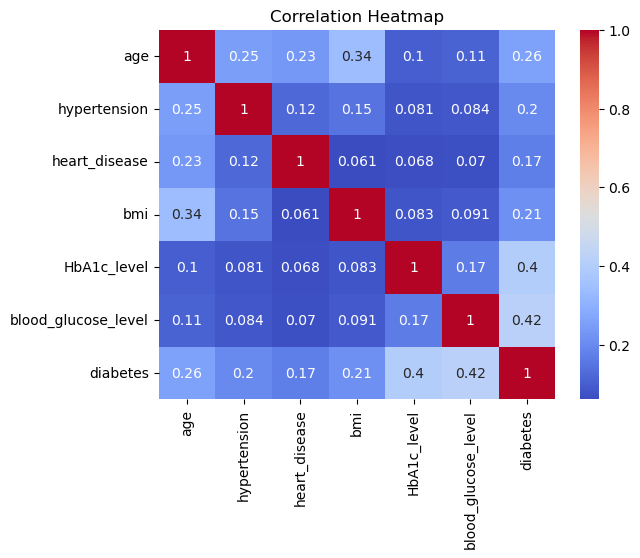

In [12]:
# calculate correlation feature
correlation_matrix = df.corr()

# Heatmap from matrix correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
df_diabet = df[df['diabetes']==1]

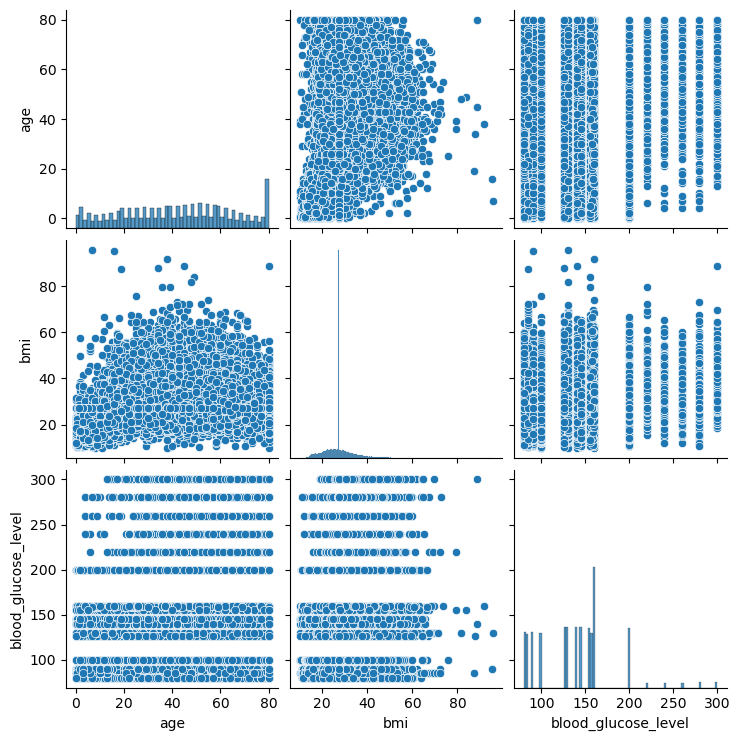

In [15]:
c=['age', 'bmi', 'blood_glucose_level']
sns.pairplot(df[c])
    

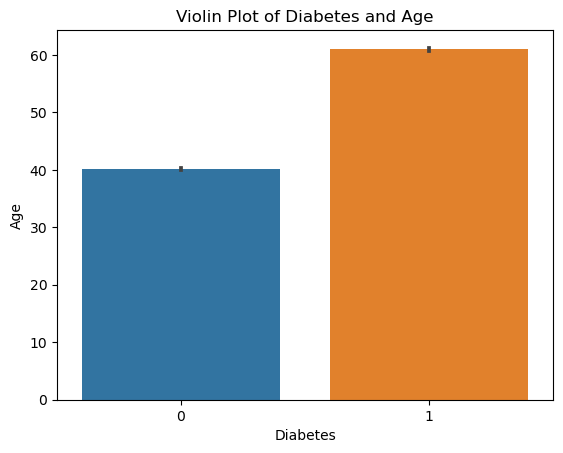

In [16]:
# Violin plot for feature 'diabetes' and 'age'
sns.barplot(x=df['diabetes'], y=df['age'])
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.title('Violin Plot of Diabetes and Age')
plt.show()

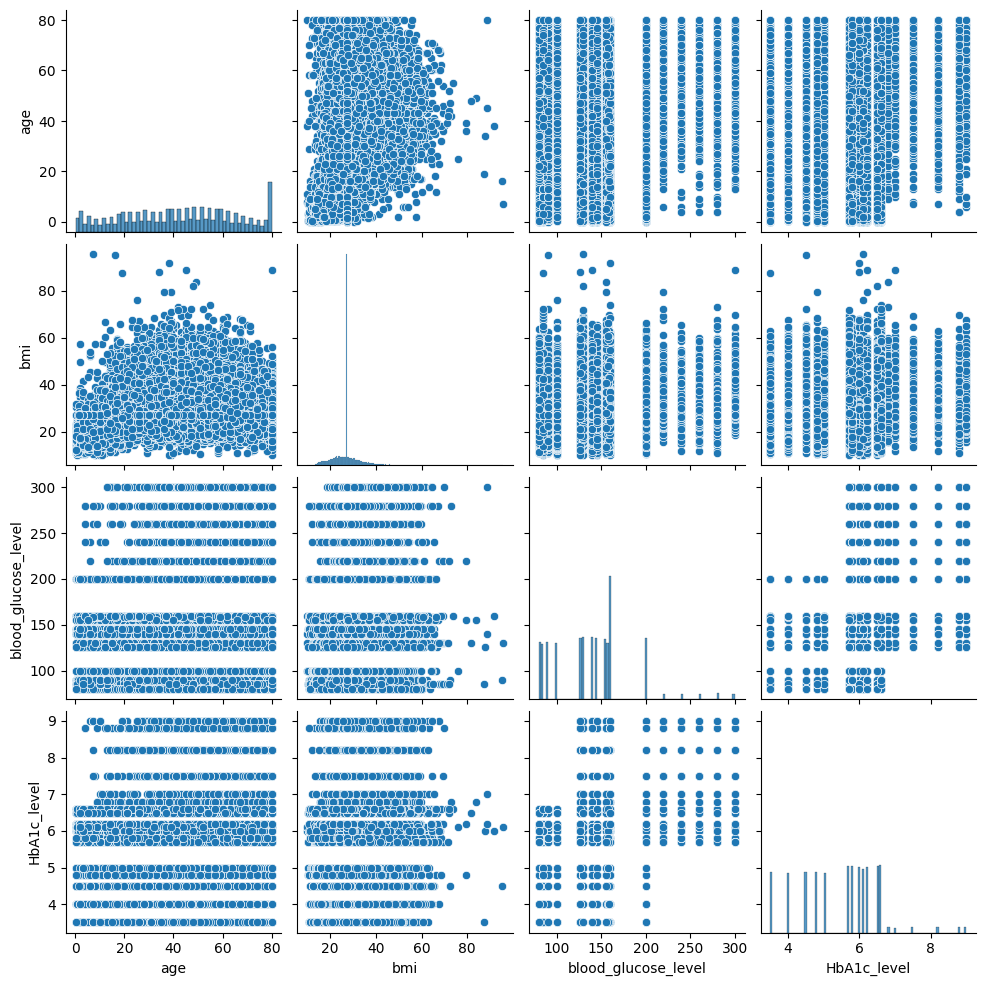

In [ ]:
# Pair plot
sns.pairplot(df[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']])
plt.show()

In [18]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

# Preprocess

In [17]:
# One-hot encoding untuk variabel 'gender'
gender_encoded = pd.get_dummies(df['gender'], prefix='gender')

# One-hot encoding untuk variabel 'smoking_history'
smoking_encoded = pd.get_dummies(df['smoking_history'], prefix='smoking')

dataset_encoded = pd.concat([df, gender_encoded, smoking_encoded], axis=1)
dataset_encoded = dataset_encoded.drop(columns=['gender','smoking_history'],axis=1)
dataset_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0


In [19]:
dataset = dataset_encoded.copy()

# Feature Engineering

In [20]:
# Age Group
dataset['age_group'] = pd.cut(dataset['age'], bins=[0, 30, 60, dataset['age'].max()], labels=['young', 'adult', 'elderly'])

# Blood Glucose Level Range
dataset['glucose_level_range'] = pd.cut(dataset['blood_glucose_level'], bins=[0, 100, 140, dataset['blood_glucose_level'].max()], labels=['low', 'normal', 'high'])

# BMI Range
dataset['bmi_range'] = pd.cut(dataset['bmi'], bins=[0, 18.5, 25, 30, dataset['bmi'].max()], labels=['underweight', 'normal weight', 'overweight', 'obese'])

# Feature Interaction: Age and Blood Glucose Level
dataset['age_glucose_interaction'] = dataset['age'] * dataset['blood_glucose_level']

In [21]:
# Age Group
dataset['age_group'] = pd.cut(dataset['age'], bins=[0, 30, 60, dataset['age'].max()], labels=['young', 'adult', 'elderly'])
age_group_encoder = LabelEncoder()
dataset['age_group'] = age_group_encoder.fit_transform(dataset['age_group'])

# Blood Glucose Level Range
dataset['glucose_level_range'] = pd.cut(dataset['blood_glucose_level'], bins=[0, 100, 140, dataset['blood_glucose_level'].max()], labels=['low', 'normal', 'high'])
glucose_level_encoder = LabelEncoder()
dataset['glucose_level_range'] = glucose_level_encoder.fit_transform(dataset['glucose_level_range'])

# BMI Range
dataset['bmi_range'] = pd.cut(dataset['bmi'], bins=[0, 18.5, 25, 30, dataset['bmi'].max()], labels=['underweight', 'normal weight', 'overweight', 'obese'])
bmi_encoder = LabelEncoder()
dataset['bmi_range'] = bmi_encoder.fit_transform(dataset['bmi_range'])


In [24]:
# Define feature weights
feature_weights = {
    'age': 0.4,
    'bmi': 0.1,
    'blood_glucose_level': 0.3,
    'HbA1c_level': 0.3
}

# Calculate diabetes risk score
dataset['diabetes_risk_score'] = (
    dataset['age'] * feature_weights['age'] +
    dataset['bmi'] * feature_weights['bmi'] +
    dataset['blood_glucose_level'] * feature_weights['blood_glucose_level'] +
    dataset['HbA1c_level'] * feature_weights['HbA1c_level']
)

In [25]:
# Calculate feature ratios
dataset['glucose_to_hba1c_ratio'] = dataset['blood_glucose_level'] / dataset['HbA1c_level']
dataset['bmi_to_age_ratio'] = dataset['bmi'] / dataset['age']

In [26]:
# Calculate feature differences
dataset['glucose_hba1c_difference'] = dataset['blood_glucose_level'] - dataset['HbA1c_level']
dataset['bmi_age_difference'] = dataset['bmi'] - dataset['age']

# Calculate percentage difference (optional)
dataset['glucose_hba1c_percentage_diff'] = (dataset['blood_glucose_level'] - dataset['HbA1c_level']) / dataset['HbA1c_level'] * 100
dataset['bmi_age_percentage_diff'] = (dataset['bmi'] - dataset['age']) / dataset['age'] * 100


In [27]:
dataset.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,...,glucose_level_range,bmi_range,age_glucose_interaction,diabetes_risk_score,glucose_to_hba1c_ratio,bmi_to_age_ratio,glucose_hba1c_difference,bmi_age_difference,glucose_hba1c_percentage_diff,bmi_age_percentage_diff
0,80.0,0,1,25.19,6.6,140,0,1,0,0,...,2,2,11200.0,78.499,21.212121,0.314875,133.4,-54.81,2021.212121,-68.512500
1,54.0,0,0,27.32,6.6,80,0,1,0,0,...,1,2,4320.0,50.312,12.121212,0.505926,73.4,-26.68,1112.121212,-49.407407
2,28.0,0,0,27.32,5.7,158,0,0,1,0,...,0,2,4424.0,63.042,27.719298,0.975714,152.3,-0.68,2671.929825,-2.428571
3,36.0,0,0,23.45,5.0,155,0,1,0,0,...,0,0,5580.0,64.745,31.000000,0.651389,150.0,-12.55,3000.000000,-34.861111
4,76.0,1,1,20.14,4.8,155,0,0,1,0,...,0,0,11780.0,80.354,32.291667,0.265000,150.2,-55.86,3129.166667,-73.500000


# Modelling

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   age                            100000 non-null  float64
 1   hypertension                   100000 non-null  int64  
 2   heart_disease                  100000 non-null  int64  
 3   bmi                            100000 non-null  float64
 4   HbA1c_level                    100000 non-null  float64
 5   blood_glucose_level            100000 non-null  int64  
 6   diabetes                       100000 non-null  int64  
 7   gender_Female                  100000 non-null  uint8  
 8   gender_Male                    100000 non-null  uint8  
 9   gender_Other                   100000 non-null  uint8  
 10  smoking_No Info                100000 non-null  uint8  
 11  smoking_current                100000 non-null  uint8  
 12  smoking_ever                   

In [29]:
X = dataset.drop('diabetes', axis=1)
y = dataset['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.58      0.69      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.79      0.83     20000
weighted avg       0.95      0.96      0.95     20000

Confusion Matrix:
 [[18125   167]
 [  717   991]]


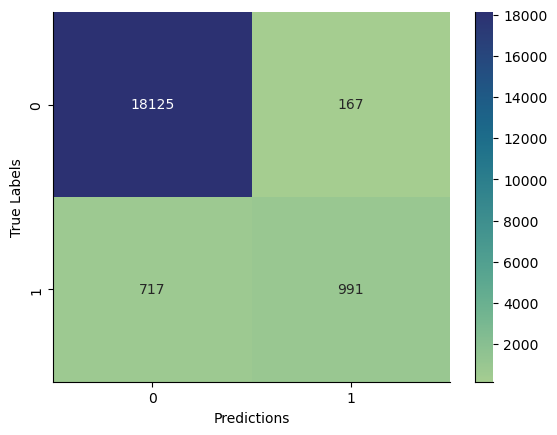

In [51]:
ax=sns.heatmap(matrix,cmap="crest",annot=True,fmt='d')
ax.set(ylabel="True Labels", xlabel="Predictions")
sns.despine()

In [35]:
# Initialize the logistic regression model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix:
 [[18226    66]
 [  528  1180]]


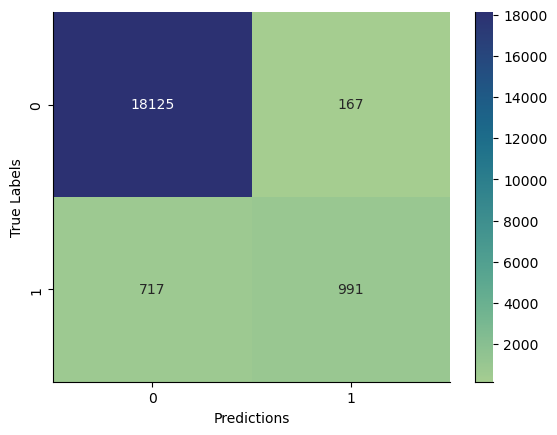

In [50]:
ax=sns.heatmap(matrix,cmap="crest",annot=True,fmt='d')
ax.set(ylabel="True Labels", xlabel="Predictions")
sns.despine()